In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,cross_val_predict

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/audio_gender_classification/voice.csv')

In [ ]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [ ]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


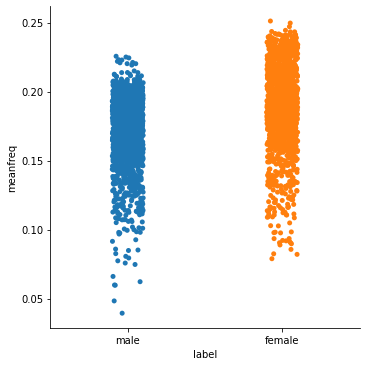

In [ ]:
sns.catplot(x="label", y="meanfreq", data=df)

Changing labels to 0 and 1

In [ ]:
for i in range(0,len(df)):
  if(df['label'][i] == 'male'):
    df['label'][i] = 1
  else:
    df['label'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [ ]:
df['label']

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: object

In [ ]:
# df_numpy = df.to_numpy()
# type(df_numpy)

numpy.ndarray

Shuffle

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3071,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,0.459881,0.171014,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073,0
1346,0.179838,0.060027,0.188984,0.123883,0.219955,0.096072,1.453532,4.820096,0.912606,0.432740,0.191512,0.179838,0.119143,0.047384,0.269663,0.943359,0.023438,4.453125,4.429688,0.164021,1
426,0.190983,0.060419,0.210278,0.128889,0.239444,0.110556,1.358908,4.394383,0.922760,0.461581,0.210278,0.190983,0.102835,0.018370,0.258065,0.456752,0.117188,2.835938,2.718750,0.146977,1
2576,0.220121,0.029492,0.222936,0.205043,0.232608,0.027565,3.345215,16.062448,0.806673,0.148746,0.225354,0.220121,0.182577,0.047666,0.279070,2.122044,0.210938,20.414062,20.203125,0.070653,0
958,0.186507,0.063279,0.177671,0.125569,0.245890,0.120321,1.855088,6.853354,0.891677,0.314426,0.118447,0.186507,0.129999,0.047198,0.279070,1.105312,0.023438,5.062500,5.039062,0.093437,1


Splitting data <br>
train: 75%
validation: 15%
test: 10%

In [ ]:
train,test = train_test_split(df, test_size = 0.10)

In [ ]:
#train, validation = train_test_split(train, test_size = 0.15)

In [ ]:
print("Length of training set:",len(train), "\nLength of test set:",len(test))

Length of training set: 2851 
Length of test set: 317


In [ ]:
Y_train = train['label']
X_train = train.drop(columns='label')
Y_test = test['label']
X_test = test.drop(columns='label')
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

# Using SVM

In [ ]:
clf = svm.SVC(kernel='linear')

In [ ]:
#No cross validation
#clf.fit(X_train,Y_train)

In [ ]:
scores = cross_val_score(clf, X_train, Y_train, cv=2)

In [ ]:
scores

array([0.90182328, 0.91508772])

In [ ]:
test_predict = cross_val_predict(clf,X_test,Y_test)

In [ ]:
print("Accuracy:",accuracy_score(Y_test, test_predict) * 100)

Accuracy: 82.96529968454259


# Using a Neural Net

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=20, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                1344      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=opt,
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])
#kullback_leibler_divergence

In [ ]:
train_2,test_2 = train_test_split(df, test_size = 0.10)

In [ ]:
train_2, val = train_test_split(train_2, test_size = 0.15)

In [ ]:
Y_train_2 = train_2['label']
X_train_2 = train_2.drop(columns='label')
Y_val_2 = val['label']
X_val_2 = val.drop(columns='label')
Y_train_2 = Y_train_2.astype('int')
Y_val_2 = Y_val_2.astype('int')

In [ ]:
history = model.fit(X_train_2,Y_train_2,epochs=150,validation_data=(X_val_2,Y_val_2))

Epoch 1/150
76/76 [==============================] - 2s 8ms/step - loss: 0.7453 - accuracy: 0.5435 - val_loss: 0.6297 - val_accuracy: 0.6355
Epoch 2/150
76/76 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.5917 - val_loss: 0.6133 - val_accuracy: 0.6636
Epoch 3/150
76/76 [==============================] - 0s 3ms/step - loss: 0.6317 - accuracy: 0.6569 - val_loss: 0.5761 - val_accuracy: 0.6799
Epoch 4/150
76/76 [==============================] - 0s 4ms/step - loss: 0.5979 - accuracy: 0.6716 - val_loss: 0.5428 - val_accuracy: 0.7290
Epoch 5/150
76/76 [==============================] - 0s 3ms/step - loss: 0.5770 - accuracy: 0.7041 - val_loss: 0.5222 - val_accuracy: 0.7150
Epoch 6/150
76/76 [==============================] - 0s 4ms/step - loss: 0.5343 - accuracy: 0.7313 - val_loss: 0.4903 - val_accuracy: 0.7710
Epoch 7/150
76/76 [==============================] - 0s 4ms/step - loss: 0.5377 - accuracy: 0.7330 - val_loss: 0.4761 - val_accuracy: 0.7827
Epoch 8/150
7

In [ ]:
Y_test_2 = test_2['label'].astype('int')
X_test_2 = test_2.drop(columns='label')

In [ ]:
results = model.evaluate(X_test_2, Y_test_2)
print("test loss, test acc:", results)

10/10 [==============================] - 0s 2ms/step - loss: 0.0989 - accuracy: 0.9495
test loss, test acc: [0.09886176139116287, 0.9495267868041992]


In [ ]:
print("Generate predictions for 3 samples")
predictions = model.predict(X_test_2)
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
predictions shape: (317, 1)


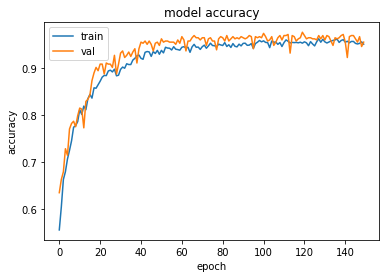

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

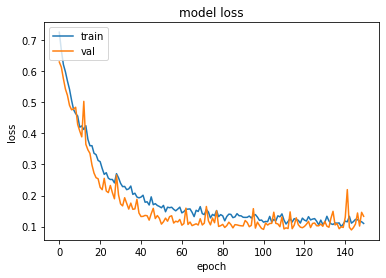

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()